In [1]:
from   datetime import datetime
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from models.pct_in_optimizer.optimizer import (
    PercentInOptimizer, plot_results)

In [2]:
RECURSION_LIMIT = 100
sys.setrecursionlimit(RECURSION_LIMIT)

In [3]:
FRIDAY = 4
weekday = datetime.now().weekday()
ITERS = 75 if weekday >= FRIDAY else 1
print('ITERS:', ITERS)
OUTPATH = '../data/pct_params'
years_of_data = 5
symbols = ['^W5000', '^IXIC']
tickers = {'^W5000': 'wilshire',
           '^IXIC': 'nasdaq'}
paths = {'^NYA': '../data/nya1965.csv',
         '^IXIC': '../data/nasdaq1965.csv',
         '^W5000': '../data/wilshire1990.csv'}

ITERS: 1





WILSHIRE


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/wilshire_5yr_3param.json
{   'params': {   'amounts': [-0.5908505629826266, 0.99, 0.99],
                  'qs': [0.01, -0.99, 0.1159316934422504]},
    'sd': 0.023713571811281094,
    'window': 20}
 1: Final value: $51943.60 (window = 20; sd = 0.024)

% in now: 1.0
Actions taken: 40
Wrote params to ../data/pct_params/wilshire_5yr_3param.json


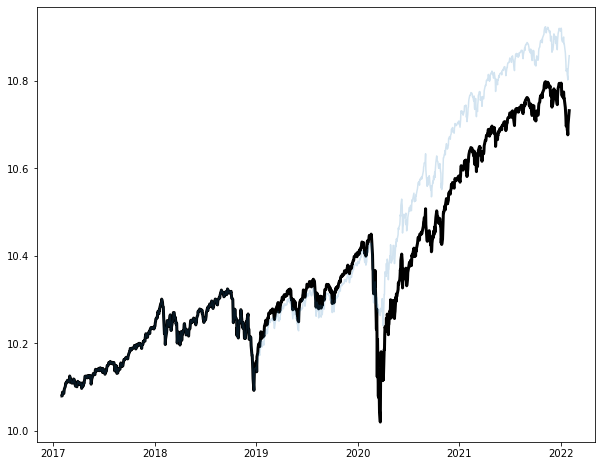

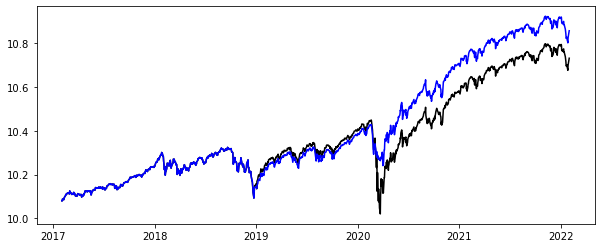

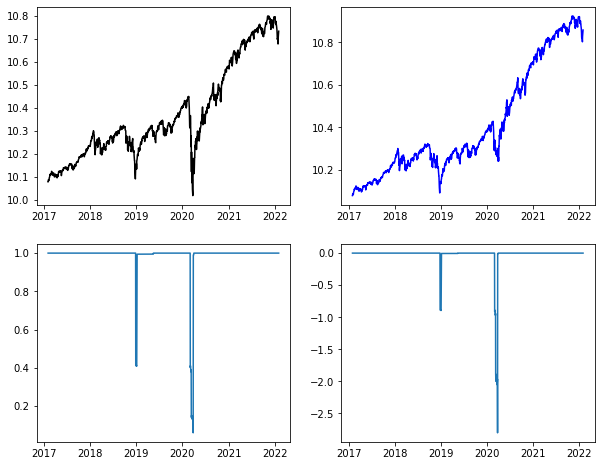



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/wilshire_5yr_2param.json
{   'params': {   'amounts': [-0.06382175736915263, 0.6071305919172136],
                  'qs': [0.4782118949616154, 0.2707704379924941]},
    'sd': 0.024278711105847967,
    'window': 630}
 1: Final value: $45825.38 (window = 630; sd = 0.024)

% in now: 0.5168966297410429
Actions taken: 11
Wrote params to ../data/pct_params/wilshire_5yr_2param.json


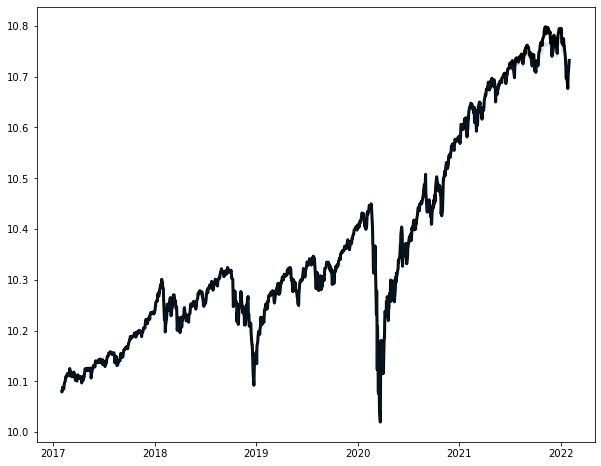

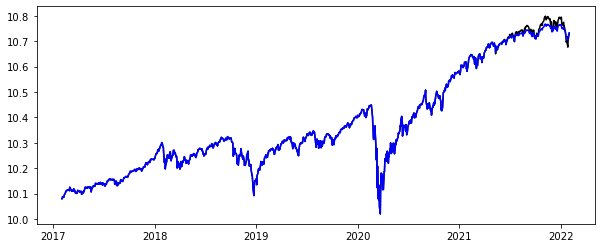

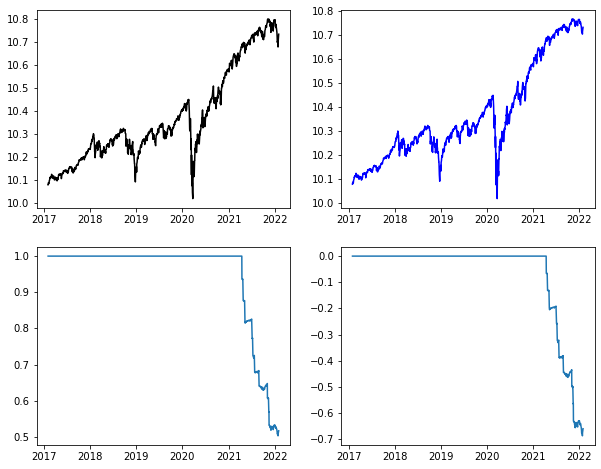



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/wilshire_5yr_1param.json
{   'params': {'amounts': [0], 'qs': [0.08815667877878242]},
    'sd': 0.04775669995519248,
    'window': 20}
 1: Final value: $45806.20 (window = 20; sd = 0.048)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/wilshire_5yr_1param.json


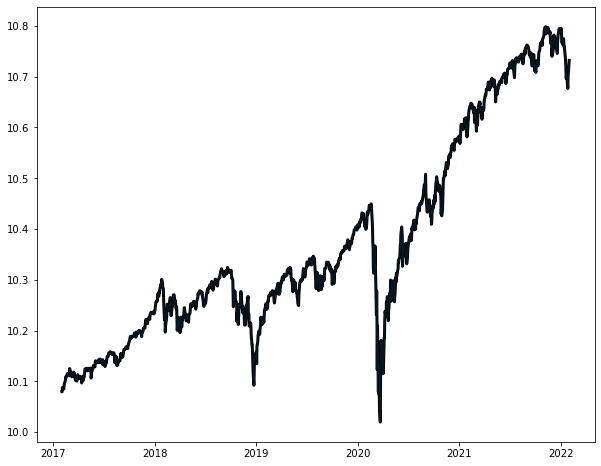

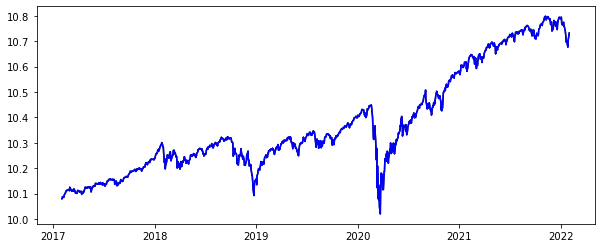

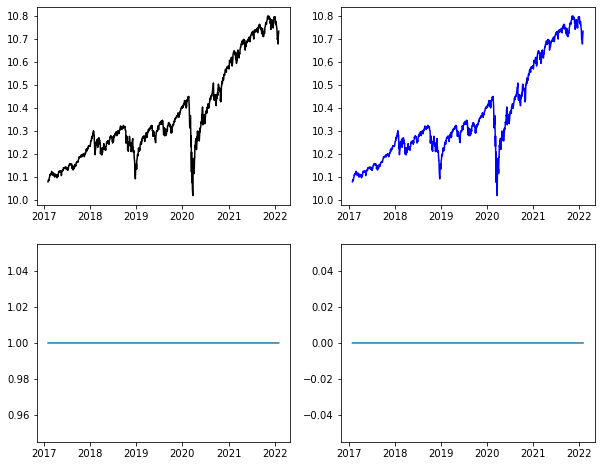




NASDAQ


--------------------------------------------------
Beginning 3-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/nasdaq_5yr_3param.json
{   'params': {   'amounts': [   -0.21754638136489854,
                                 0.49458965535256244,
                                 0.666625585858276],
                  'qs': [   -0.3783712442925801,
                            -0.8841038857604839,
                            -0.12347413964201025]},
    'sd': 0.05573625139083569,
    'window': 281}
 1: Final value: $15461.27 (window = 281; sd = 0.056)

% in now: 0.7367775898741213
Actions taken: 35
Wrote params to ../data/pct_params/nasdaq_5yr_3param.json


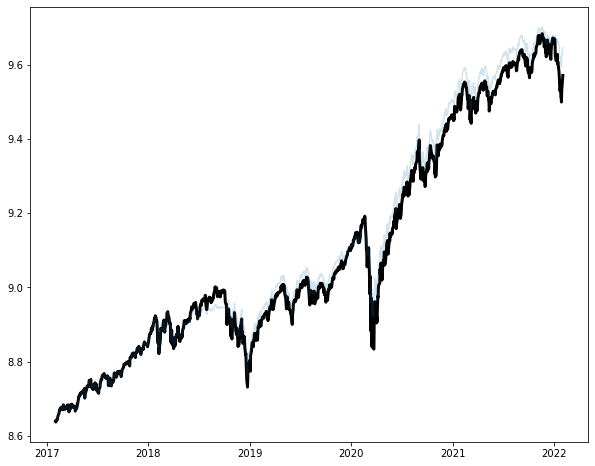

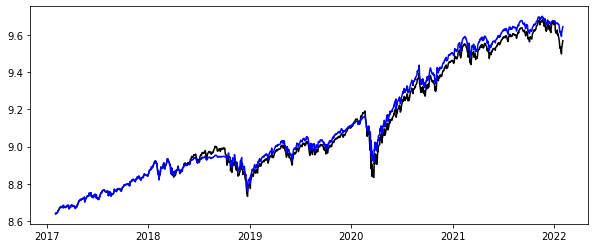

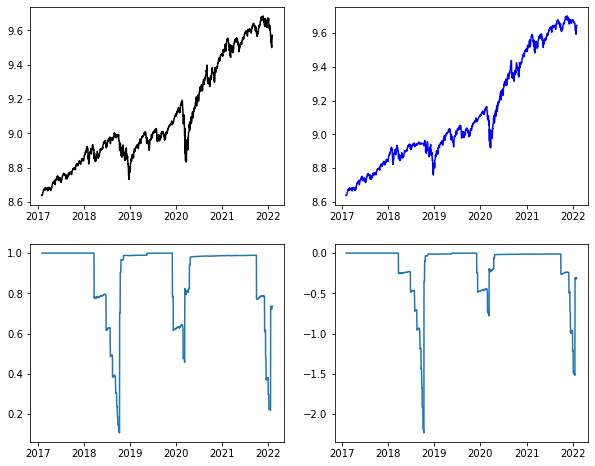



--------------------------------------------------
Beginning 2-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/nasdaq_5yr_2param.json
{   'params': {   'amounts': [0.99, -0.7352182876355093],
                  'qs': [-0.646172668013804, -0.4964676536022228]},
    'sd': 0.01293032993310463,
    'window': 630}
 1: Final value: $14021.42 (window = 630; sd = 0.013)

% in now: 0.07173232927448774
Actions taken: 2
Wrote params to ../data/pct_params/nasdaq_5yr_2param.json


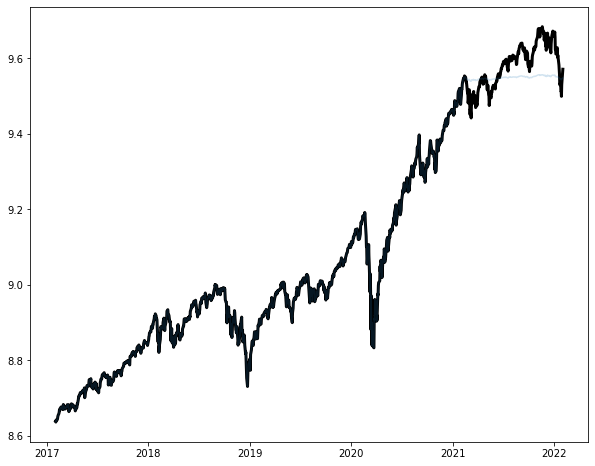

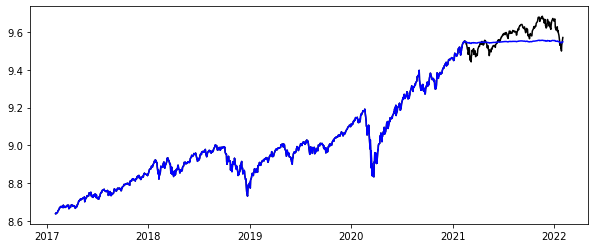

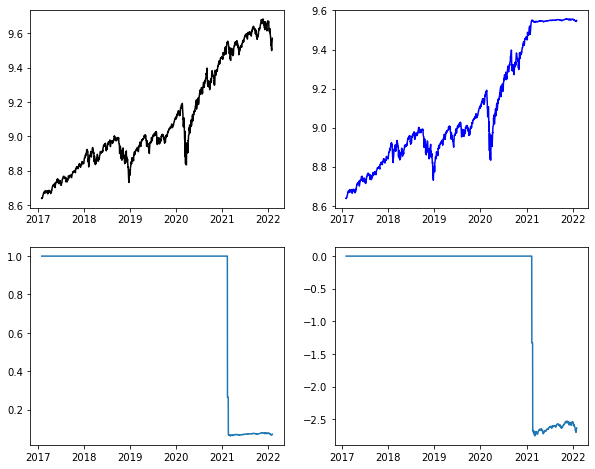



--------------------------------------------------
Beginning 1-param model...
--------------------------------------------------
Using start date: 2017-02-01
Successfully loaded params from ../data/pct_params/nasdaq_5yr_1param.json
{   'params': {'amounts': [0], 'qs': [-0.582313407869478]},
    'sd': 0.04775669995519248,
    'window': 20}
 1: Final value: $14346.00 (window = 20; sd = 0.048)

% in now: 1.0
Actions taken: 0
Wrote params to ../data/pct_params/nasdaq_5yr_1param.json


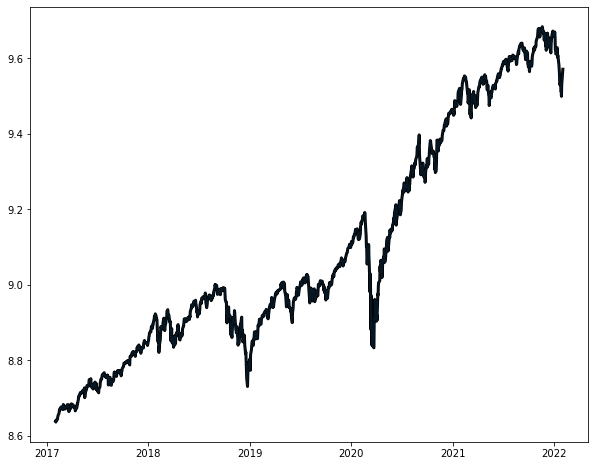

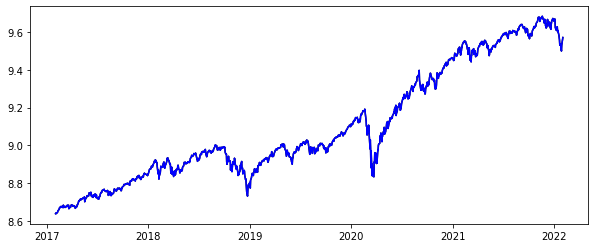

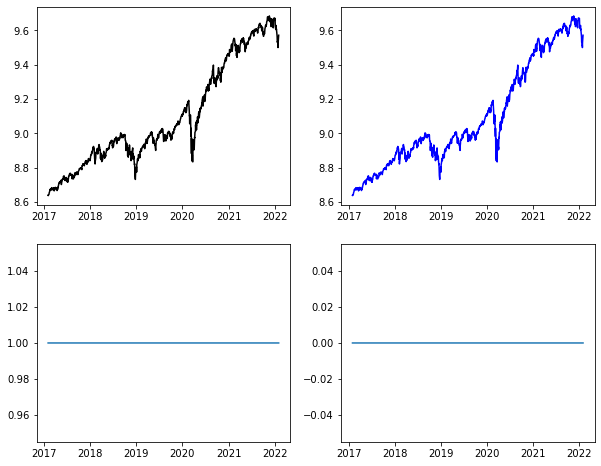

Percents in:
wilshire: [1.0, 0.5169, 1.0]
nasdaq: [0.7368, 0.0717, 1.0]


In [4]:
percent_in = {}

for symbol in symbols:
    ticker = tickers[symbol]
    path = paths[symbol]
    percent_in[ticker] = []
    print(f'\n\n\n{"=" * 60}')
    print(ticker.upper())
    print('=' * 60)
    for n_params in [3, 2, 1]:
        print(f'\n\n{"-" * 50}')
        print(f'Beginning {n_params}-param model...')
        print('-' * 50)
        filename = f'{ticker}_{years_of_data}yr_{n_params}param.json'
        optim = PercentInOptimizer(n_params, years_of_data, symbol)
        optim.load_params(f'{OUTPATH}/{filename}')
        optim.get_data(df=path)
        specified = None
        best_data = optim.run_sim(ITERS)
        percent_in[ticker].append(plot_results(best_data))
        optim.save_params(f'{OUTPATH}/{filename}')
        plt.show()
print('Percents in:')
for k, v in percent_in.items():
    v = [round(val, 4) for val in v]
    print(f'{k}: {v}')